In [1]:
import pandas as pd
import numpy as np
import os,  sys

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from grouping import Grouping, Resource

In [2]:
# We will analyse the renamed "dmlz_assay" csv file in this notebook
DH_ROOT = '../data/ptfi_2/dh_and_bm_data/drillholes/'

assay = pd.read_csv(DH_ROOT + 'assay.csv')

In [3]:
assay

,HOLEID,FROM,TO,INTLEN,SAMPID,CU,AU,AG
0,DZ30-01SM-04,0.8,3.8,3.0,816694,0.4531,0.290,2.4
1,DZ30-01SM-04,3.8,6.3,2.5,816695,0.0622,0.040,0.3
2,DZ30-01SM-04,6.3,8.8,2.5,816696,1.8893,0.460,8.9
3,DZ30-01SM-04,8.8,11.4,2.6,816697,1.9882,0.420,10.1
4,DZ30-01SM-04,11.4,14.4,3.0,816698,2.2500,0.640,11.1
...,...,...,...,...,...,...,...,...
132204,TEW01-10,338.4,341.4,3.0,378673,0.0022,0.020,0.8
132205,TEW01-10,341.4,344.4,3.0,378675,0.0026,0.005,0.3
132206,TEW01-10,344.4,347.4,3.0,378676,0.0018,0.020,0.9
132207,TEW01-10,347.4,350.4,3.0,378677,0.0166,0.010,0.7


In [4]:
element_assay_cols = ['CU', 'AU', 'AG']
idx = assay.index[assay['CU'] < 0.0].to_list()
assay.iloc[idx]

,HOLEID,FROM,TO,INTLEN,SAMPID,CU,AU,AG
1253,M12-12,156.0,159.00,3.00,M12-12_0156_0159,-9.0,0.16,1.6
58779,M7-15,81.0,84.90,3.90,M7-15_0081_0084,-9.0,0.88,1.0
78480,M6-5,219.0,222.00,3.00,M6-5_0219_0222,-9.0,0.11,1.0
82622,M7-6,261.0,262.20,1.20,M7-6_0261_0262,-9.0,0.04,1.0
82623,M7-6,262.2,265.25,3.05,M7-6_0262_0265,-9.0,0.25,1.0
87279,M6-9,288.0,290.00,2.00,M6-9_0288_0290,-9.0,0.57,1.0
120431,M8-11,24.0,27.00,3.00,M8-11_0024_0027,-9.0,0.67,1.0
122315,M12-6B,147.0,150.00,3.00,M12-6B_0147_0150,-9.0,0.27,4.1
122542,M8-12,297.0,300.00,3.00,M8-12_0297_0300,-9.0,0.03,1.0


In [5]:
assay = assay.replace(-9, np.nan)

In [6]:
assay.describe()

,FROM,TO,INTLEN,CU,AU,AG
count,132209.000000,132209.000000,132209.000000,132200.000000,129385.000000,126988.000000
mean,202.491631,204.932582,2.440951,0.954880,0.713305,4.440873
std,195.537457,195.938056,0.875741,1.551783,1.723895,7.514259
min,0.000000,0.450000,0.050000,0.000300,0.005000,0.100000
25%,48.000000,50.000000,1.500000,0.170000,0.120000,0.900000
50%,132.000000,135.000000,3.000000,0.398100,0.340000,2.200000
75%,314.700000,317.600000,3.000000,1.050000,0.720000,5.000000
max,1297.500000,1300.000000,60.250000,56.910000,141.000000,419.000000


In [7]:
unique_hole_ids = list(assay['HOLEID'].unique())

In [8]:
drillhole_dfs = {}

for hole_id in unique_hole_ids:
    df = assay.query('HOLEID == @hole_id').sort_values(by=['FROM']).reset_index(drop=True)
    drillhole_dfs[hole_id] = df

In [9]:
# class Resource:
#     def __init__(self, weights: np.array, grades: np.array):
#         data = {
#             'weight': weights,
#             'grade': grades
#         }
        
#         cleaned_info = self.clean_data(pd.DataFrame(data))
#         self.info = self.calculate_derived_data(cleaned_info)
#         self.calculate_dist_heterogeneity(self.info)
#         self.cons_het = self.calculate_cons_heterogeneity(self.info)
             
#     def clean_data(self, data: pd.DataFrame):
#         # data = data.replace(-9, np.nan)
#         data = data.dropna(axis=0)
#         data = data.sort_values(by='grade', ascending=False)
#         data = data.reset_index(drop=True)
        
#         return data
    
#     def calculate_derived_data(self, cleaned_info: pd.DataFrame):
#         df = cleaned_info
#         df['cml_weight'] = df['weight'].cumsum()
    
#         sum_weights = sum(df['weight'])
#         df['weight_pct'] = np.divide(df['weight'], sum_weights)
#         df['cml_weight_pct'] = df['weight_pct'].cumsum()
#         df['yield'] = np.multiply(df['weight'], df['grade'])
#         df['cml_yield'] = df['yield'].cumsum()
#         df['cml_grade'] = np.divide(df['cml_yield'], df['cml_weight'])
        
#         sum_yield = sum(df['yield'])
#         df['recovery'] = np.divide(df['yield'], sum_yield)
#         df['cml_recovery'] = df['recovery'].cumsum()
        
#         return df
    
#     def calculate_dist_heterogeneity(self, df):
#         if len(df) > 0:
#             b = df['weight']
#             c = df['cml_grade'].iloc[-1]
#             d = sum(df['weight'])
#             a = np.subtract(df['grade'], c)

#             num, den = np.multiply(a, b), np.multiply(c, d)
#             df['dist_het'] = np.power(np.divide(num, den), 2)  # (num/den)^2
        
#     def calculate_cons_heterogeneity(self, df):
#         if len(df) > 0:
#             return len(df) * sum(df['dist_het'])
#         else:
#             return np.NaN

    
# class Grouping:
#     def __init__(self, id):
#         self.id = id
#         self.resources = {}
        
#     def add_resource(self, resource_id: str, weights: np.array, grades: np.array):
#         if len(weights) == len(grades):
            
#             # if len(weights) > 0:
#             self.resources[resource_id] = Resource(weights, grades)
#             # else:
#             #     print(f"No Data for {resource_id}")
            
#         else:
#             raise Exception(f"[Grouping ID: {id}] Weight and grade arrays must be same length.")

In [10]:
drillholes = {}

for dhid, data in drillhole_dfs.items():
    drillholes[dhid] = Grouping(dhid)
    for element in element_assay_cols:
        drillholes[dhid].add_resource(element, data['INTLEN'], data[element])

# dh = drillhole_dfs['M12-12']
# m12_12 = Grouping('M12-12')
# for element in element_assay_cols:
#     m12_12.add_resource(element, dh['INTLEN'], dh[element])

In [11]:
m12_12 = drillholes['M12-12']
m12_12.resources['AU'].info.head()

,weight,grade,cml_weight,weight_pct,cml_weight_pct,yield,cml_yield,cml_grade,recovery,cml_recovery,int_het
0,3.0,2.07,3.0,0.01771,0.017710,6.21,6.21,2.0700,0.074345,0.074345,0.003208
1,3.0,1.68,6.0,0.01771,0.035419,5.04,11.25,1.8750,0.060338,0.134682,0.001817
2,3.0,1.68,9.0,0.01771,0.053129,5.04,16.29,1.8100,0.060338,0.195020,0.001817
3,3.0,1.64,12.0,0.01771,0.070838,4.92,21.21,1.7675,0.058901,0.253921,0.001697
4,3.0,1.50,15.0,0.01771,0.088548,4.50,25.71,1.7140,0.053873,0.307794,0.001308


In [12]:
m12_12.resources['AU'].heterogeneity

0.9509050558336213

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def plot_grade_recovery_curve(ax: plt.Axes, df: pd.DataFrame, element: str):
    s = 3
    
    ax_sec = ax.twinx()

    x = df['cml_weight_pct']
    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    y = df['cml_grade']
    ax.set_ylim(0, y.quantile(q=0.99))
    ax.set_ylabel(f"Cumulative {element} Grade", c="blue")
    
    ax.plot(x, y, color='blue', alpha=0.2, ls='--')
    ax.scatter(x, y, color='blue', s=s)


    y = df['cml_recovery']
    ax_sec.set_ylabel(f"Cumulative {element} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    ax_sec.plot([0, 1], [0, 1], color='grey', alpha=0.2, ls='-.')

    ax_sec.plot(x, y, color='red', alpha=0.2, ls='--')
    ax_sec.scatter(x, y, color='red', s=s)

    y_prime = np.subtract(y, x)
    x_star = np.argmax(y_prime)
    ax_sec.plot(x, y_prime, color='red', alpha=0.2, ls=':')

    x_rec, y_rec = x[x_star], y[x_star]
    ax_sec.plot([x_rec, 1], [y_rec, y_rec], c="black", ls=':', alpha=0.35)
    ax_sec.annotate(f"{y_rec * 100:.3}%", (1, y_rec), xytext=(-35, -15), textcoords='offset points')

    y_grade = df['cml_grade'][x_star]
    ax.plot([0, x_rec], [y_grade, y_grade], c="black", ls=':', alpha=0.35)
    ax.annotate(f"{y_grade:.3}", (0, y_grade), xytext=(5, 10), textcoords='offset points')

    ax.plot([x_rec, x_rec], [min(df['cml_grade']), y_grade], c="black", ls=':', alpha=0.35)
    ax_sec.plot([x_rec, x_rec], [0, y_rec], c="black", ls=':', alpha=0.35)
    ax_sec.annotate(f"{x_rec * 100:.3}%", (x_rec, 0), xytext=(5, 10), textcoords='offset points', rotation=90)

In [14]:
# output_dir = "../outputs/het_analysis_assay/"

# fig = plt.figure()
# fig.set_size_inches(8, 8)

# # dhid = "M12-12"
# # drillhole = drillholes[dhid]

# for dhid, drillhole in drillholes.items():
#     # print(dhid)
#     save_loc = output_dir + f'{dhid}/'
#     if not os.path.exists(save_loc):
#         os.makedirs(save_loc)

#     for element in element_assay_cols:
#         fig.clear()
#         ax = fig.add_subplot()

#         ch = drillhole.resources[element].heterogeneity
#         df = drillhole.resources[element].info
        
#         if len(df) > 0:
#             ax.set_title(f'{dhid}_{element}_CH={ch:.2f}')
#             plot_grade_recovery_curve(ax, df, element)

#             fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')

In [15]:
drillholes["J9-4-4"].resources['AG'].info

,weight,grade,cml_weight,weight_pct,cml_weight_pct,yield,cml_yield,cml_grade,recovery,cml_recovery,int_het
0,1.0,28.0,1.0,0.008929,0.008929,28.0,28.0,28.000000,0.051020,0.051020,0.001772
1,1.0,23.9,2.0,0.008929,0.017857,23.9,51.9,25.950000,0.043550,0.094570,0.001199
2,1.0,16.0,3.0,0.008929,0.026786,16.0,67.9,22.633333,0.029155,0.123724,0.000409
3,1.0,14.3,4.0,0.008929,0.035714,14.3,82.2,20.550000,0.026057,0.149781,0.000293
4,1.0,14.1,5.0,0.008929,0.044643,14.1,96.3,19.260000,0.025692,0.175474,0.000281
...,...,...,...,...,...,...,...,...,...,...,...
107,1.0,1.2,108.0,0.008929,0.964286,1.2,546.8,5.062963,0.002187,0.996356,0.000045
108,1.0,0.5,109.0,0.008929,0.973214,0.5,547.3,5.021101,0.000911,0.997267,0.000064
109,1.0,0.5,110.0,0.008929,0.982143,0.5,547.8,4.980000,0.000911,0.998178,0.000064
110,1.0,0.5,111.0,0.008929,0.991071,0.5,548.3,4.939640,0.000911,0.999089,0.000064


In [16]:
chs = {}
for element in element_assay_cols:
    chs[element] = []
    
for dhid, drillhole in drillholes.items():
    for element in element_assay_cols:
        ch = drillhole.resources[element].heterogeneity
        chs[element].append(ch)
    
# for dhid, drillhole in drillholes.items():
    

In [17]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.DataFrame(chs).describe()

,CU,AU,AG
count,1360.000000,1355.000000,1327.000000
mean,1.616888,2.537469,1.675675
std,1.545374,2.980020,2.980068
min,0.034414,0.000000,0.000000
25%,0.732319,0.928456,0.508655
50%,1.238286,1.697088,0.988875
75%,1.957457,2.920491,1.727426
max,18.504826,36.288214,45.960873


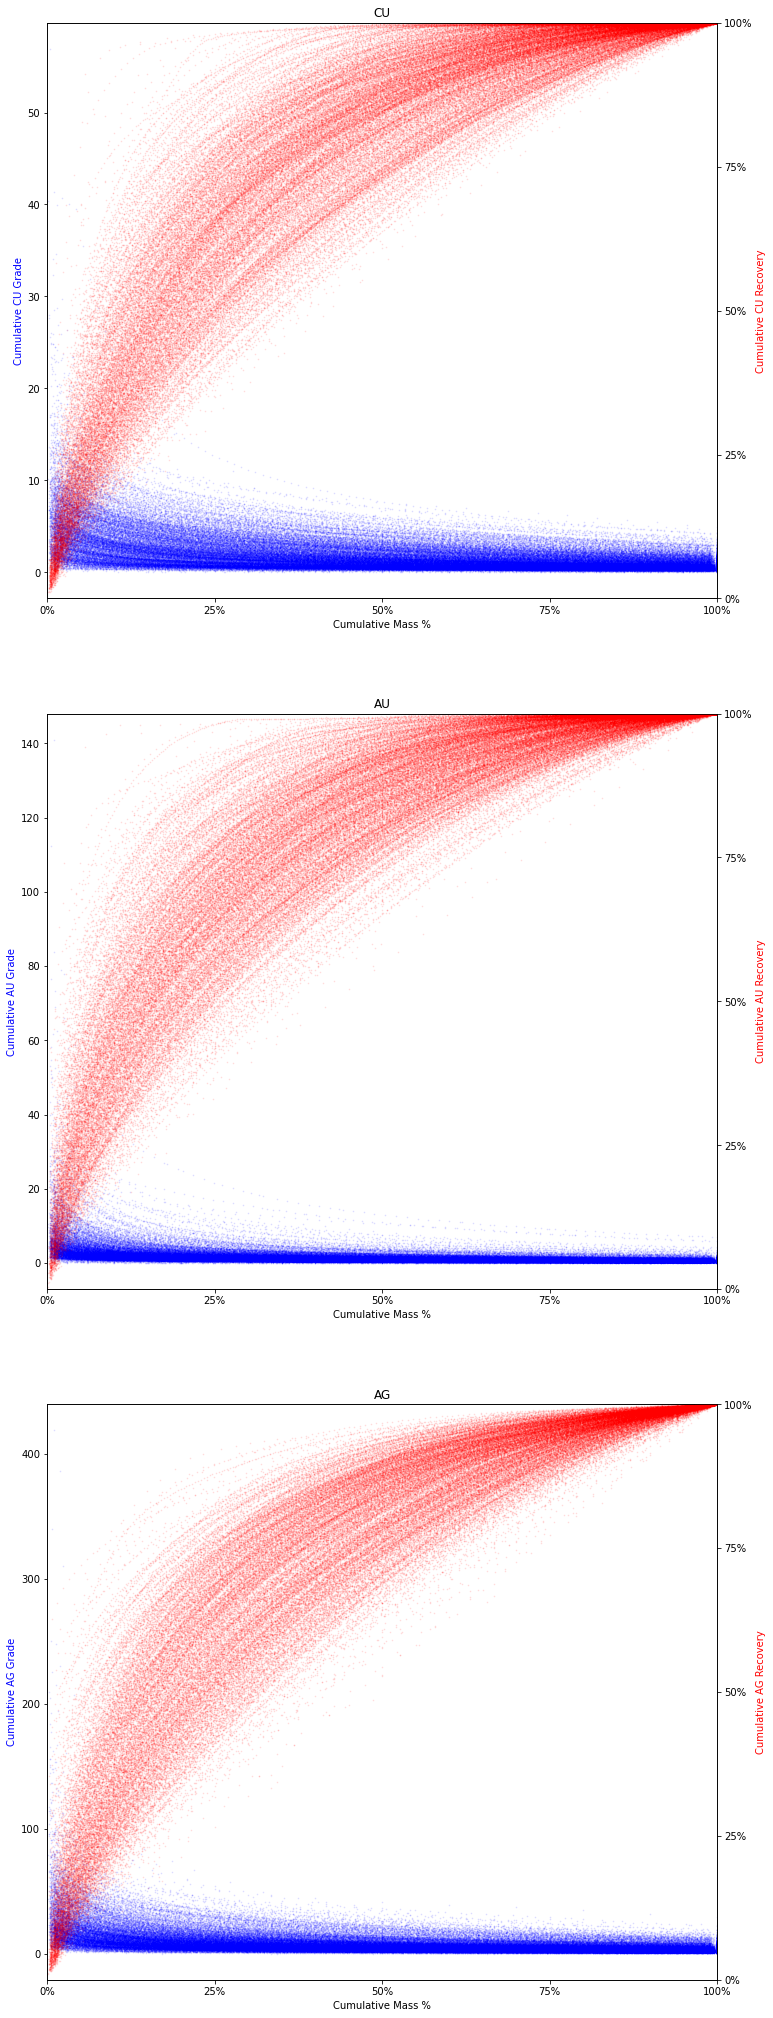

In [18]:
# then we want to graph the mass yield curves for all the individual elements
no_of_graphs = len(element_assay_cols)
fig, axs = plt.subplots(no_of_graphs)
fig.set_size_inches(12, 12 * no_of_graphs)

s = 0.5
alpha = 0.1

for idx, element in enumerate(element_assay_cols):
    ax = axs[idx]
    
    ax.set_title(element)
    ax_sec = ax.twinx()

    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # ax.set_ylim(0, None)
    ax.set_ylabel(f"Cumulative {element} Grade", c="blue")
    
    ax_sec.set_ylabel(f"Cumulative {element} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    for dhid, drillhole in drillholes.items():
        df = drillhole.resources[element].info
        x = df['cml_weight_pct']
        y = df['cml_grade']
        ax.scatter(x, y, color='blue', alpha=alpha, s=s)
        
        y = df['cml_recovery']
        ax_sec.scatter(x, y, color='red', alpha=alpha, s=s)

In [19]:
drillholes['DZ30-01SM-04'].resources['CU'].info

,weight,grade,cml_weight,weight_pct,cml_weight_pct,yield,cml_yield,cml_grade,recovery,cml_recovery,int_het
0,3.0,9.2500,3.0,0.012653,0.012653,27.75000,27.75000,9.250000,0.110551,0.110551,0.009584
1,3.0,7.5500,6.0,0.012653,0.025306,22.65000,50.40000,8.400000,0.090234,0.200785,0.006019
2,3.0,3.1300,9.0,0.012653,0.037959,9.39000,59.79000,6.643333,0.037408,0.238193,0.000613
3,3.0,2.8300,12.0,0.012653,0.050612,8.49000,68.28000,5.690000,0.033823,0.272016,0.000448
4,3.0,2.6400,15.0,0.012653,0.063264,7.92000,76.20000,5.080000,0.031552,0.303568,0.000357
...,...,...,...,...,...,...,...,...,...,...,...
74,3.0,0.1722,225.9,0.012653,0.952763,0.51660,249.58579,1.104851,0.002058,0.994307,0.000112
75,2.6,0.1638,228.5,0.010966,0.963728,0.42588,250.01167,1.094143,0.001697,0.996004,0.000086
76,3.0,0.1514,231.5,0.012653,0.976381,0.45420,250.46587,1.081926,0.001809,0.997813,0.000118
77,3.1,0.1269,234.6,0.013075,0.989456,0.39339,250.85926,1.069306,0.001567,0.999381,0.000132


In [20]:
master_data = Grouping(element)

for element in element_assay_cols:
    master_data.add_resource(element, assay['INTLEN'], assay[element])

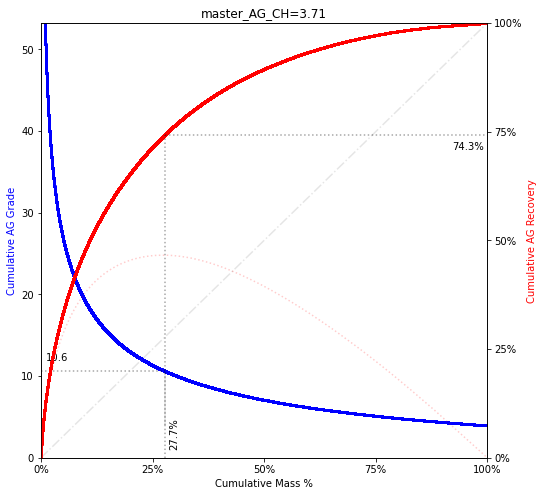

In [21]:
output_dir = "../outputs/het_analysis_assay/"

fig = plt.figure()
fig.set_size_inches(8, 8)

for element in element_assay_cols:
    fig.clear()
    ax = fig.add_subplot()

    ch = master_data.resources[element].heterogeneity
    df = master_data.resources[element].info
        
    if len(df) > 0:
        ax.set_title(f'master_{element}_CH={ch:.2f}')
        plot_grade_recovery_curve(ax, df, element)

        save_loc = output_dir + f'master/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)